In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.rename(columns={'medv':'rent'},inplace=True)

In [12]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rent
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rent
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
corr = df.corr()
corr.shape

(14, 14)

In [16]:
#creating a heatmap

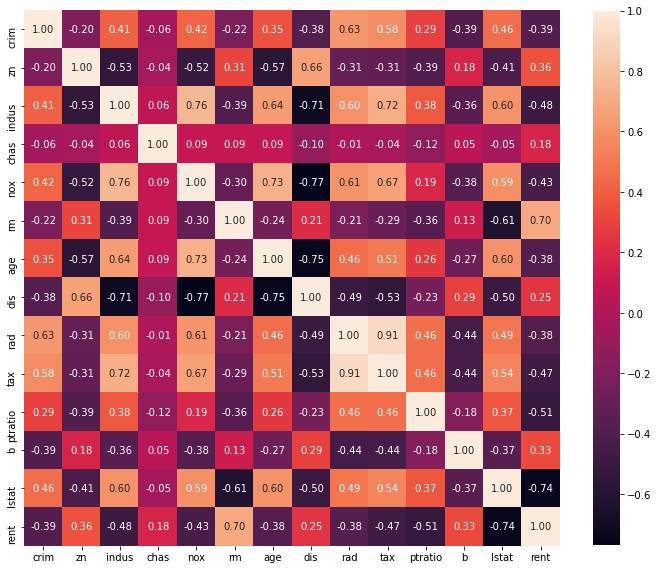

In [17]:
plt.figure(figsize=(12,12))

sns.heatmap(corr, cbar=True, square=True, cbar_kws={"shrink": .82},fmt='.2f',annot=True, annot_kws={'size':10})
plt.show()

In [18]:
df.rad.value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64

In [19]:
#Seems like there is a relation between rad and tax to check that will plot scatteplot

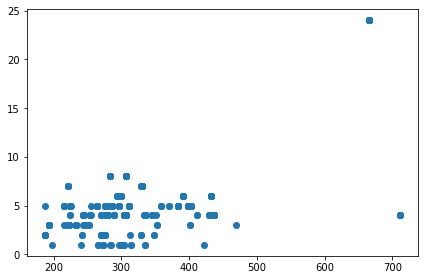

In [21]:
plt.scatter(df.tax, df.rad)
plt.tight_layout()

In [22]:
#SEPARATING FEATURE AND LABELS

In [24]:
x= df.drop('rent', axis =1)

In [28]:
y = df['rent']

In [29]:
#Train_test_split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=100)

# *Adaboost model training*

In [35]:
from sklearn.ensemble import AdaBoostRegressor

In [34]:
from sklearn import metrics

In [36]:
ada = AdaBoostRegressor()

In [37]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [38]:
y_pred = ada.predict(x_train)

In [39]:
metrics.r2_score(y_train,y_pred)

0.911193772832721

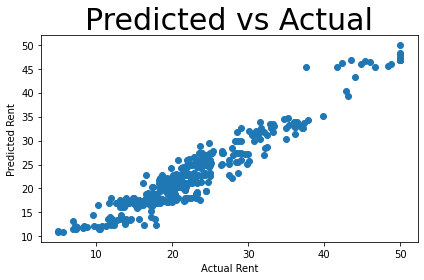

In [42]:
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Predicted vs Actual", fontsize = 30)
plt.tight_layout()

In [43]:
#Predicting test data with the model

In [59]:
y_test_pred =  ada.predict(x_test)

In [47]:
#model evaluation to check the accuracy

In [49]:
metrics.r2_score(y_test, y_test_pred)

0.8346848524370154

# *Hyperparameter tuning  with RandomizedSearchCv*

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [51]:
dt=DecisionTreeRegressor()

In [52]:
params={'n_estimators':[40,47,49,50], 'learning_rate':[0.30,0.40,0.50]}

In [55]:
randomsearch = RandomizedSearchCV(ada,cv=5,param_distributions=params)

In [56]:
randomsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.5],
                                        'n_estimators': [40, 47, 49, 50]})

In [57]:
y_pred=randomsearch.predict(x_test)

In [58]:
metrics.r2_score(y_test,y_pred)

0.8517306598794168

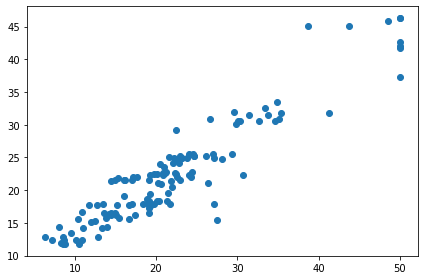

In [60]:
plt.scatter(y_test,y_pred)
plt.tight_layout()